Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost =  0.1970
Epoch: 0002 Avg. cost =  0.0549
Epoch: 0003 Avg. cost =  0.0444
Epoch: 0004 Avg. cost =  0.0380
Epoch: 0005 Avg. cost =  0.0355
Epoch: 0006 Avg. cost =  0.0339
Epoch: 0007 Avg. cost =  0.0323
Epoch: 0008 Avg. cost =  0.0311
Epoch: 0009 Avg. cost =  0.0306
Epoch: 0010 Avg. cost =  0.0302
Epoch: 0011 Avg. cost =  0.0295
Epoch: 0012 Avg. cost =  0.0290
Epoch: 0013 Avg. cost =  0.0285
Epoch: 0014 Avg. cost =  0.0273
Epoch: 0015 Avg. cost =  0.0263
Epoch: 0016 Avg. cost =  0.0258
Epoch: 0017 Avg. cost =  0.0256
Epoch: 0018 Avg. cost =  0.0252
Epoch: 0019 Avg. cost =  0.0250
Epoch: 0020 Avg. cost =  0.0246
Epoch: 0021 Avg. cost =  0.0245
Epoch: 0022 Avg. cost =  0.0244
Epoch: 0023 Avg. cost =  0.0242
Epoch: 0024 Avg. cost =  0.0240
Epoch: 0025 Avg. cost =  0.023

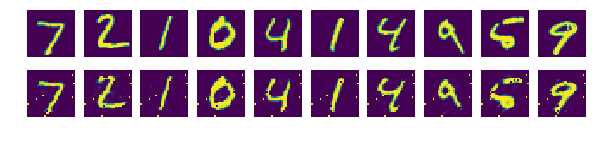

In [5]:
import tensorflow as tf
#행렬변환 및 계산
import numpy as np
import matplotlib.pyplot as plt

#MNIST 데이터 가져오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#옵션들 선언 및 초기화
learning_rate = 0.01
training_epoch = 100
#미니배치크기(이미지개수)
batch_size = 100
#은닉층 뉴련개수
n_hidden = 256
#입력값의 크기
n_input = 28 * 28

###########
#신경망구성
###########
# Y값은 비지도학습이므로 구현 하지 않음
X = tf.placeholder(tf.float32, [None, n_input])


############
#인코더생성
############

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

############
#디코더생성
############

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))


#가중치 최적화(손실함수 생성)
#tf.pow()=> 거리함수!!!!
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

#최적화 함수 설정
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

###############
#학습 진행 코드
###############
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료')


#이미지로 출력
#10개의 테스트데이터를 가져와 디코더를 이용해 출력값 만듦
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

#numpy 모듈을 이용해 MNIST데이터를 28 * 28 크기의 이미지 데이터로 재구성한 뒤 matplotlib의 imshow함수를 이용해 그래프에 이미지로 출력

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
    
plt.show()